<h1>CycleGAN Network Demonstration</h1>

CycleGAN is an unpaired image-to-image translation network using cycle-consistent generative adversarial networks.<br>
<center>
    <img src="demonstration_resources/cyclegan_blogs.jpg" style="width:50%;height:50%;"></img>
</center>
<br>
Because the network can perform unpaired transforms, it is simple to run multiple experiments simply by retraining the network using a new data set.<br><br>


<h2>Download additional models?</h2>
CycleGAN produces large network components. Each generator model file is 30MB and because the file size limit imposed on this submission is 100MB, only two model files for experiments were included in this repository. If you want more trained models, set DOWNLOAD_MODELS to 1 and all of the models will download from a different repository to a local directory and then delete after this notebook completes, otherwise only two experiments will be live demonstrations and the others will display previously generated images.

In [1]:
DOWNLOAD_MODELS = 0

<a id='contents'></a>
<h2>Contents</h2>
<a href='#ukiyoe'><h3>ukiyoe2photo</h3></a>
> Training the network using the data set ukiyoe2photo produces the transform from Ukiyo-e style paintings to photos and its inverse transform, photos to Ukiyo-e style paintings.

<a href='#vangogh'><h3>vangogh2photo</h3></a>
> Training the network using the data set vangogh2photo produces the transform from Van Gogh's paintings to photos and its inverse transform, photos to Van Gogh-styled paintings.

<a href='#bagpack'><h3>handbag_backpack</h3></a>
> Training the network using the data set handB_backP produces the transform from backpack images to handbag images and its inverse transform, handbag images to backpack images.

<h2> Test Environment Setup </h2>

In [1]:
from __future__ import print_function
import os.path
from torchvision import transforms
from Dataset import ImageSet
import torch
from torch.utils.data import DataLoader
import ModelDemoFuncs as MDF
import matplotlib.pyplot as plt
import numpy as np
import imageio
from torch.autograd import Variable
from torchvision import utils as tv
import os
reload(MDF)

imageScale = 0.25;
images = ImageSet();
path = './img/test_images/'
test_transforms = [transforms.ToTensor(),
                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))];
images.loadImageSet(path, test_transforms, "test", imageScale);
imgLoader = DataLoader(images, 1, shuffle=False);
imgs = [];
for i in range(1,7):
    imgs.append(imageio.imread("./img/test_images/IMG_"+str(i)+".JPG"));

Finished loading images


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<a id='ukiyoe'></a>
<h2>ukiyoe2photo</h2>
<a href='#contents'><p>Back to contents</p></a>

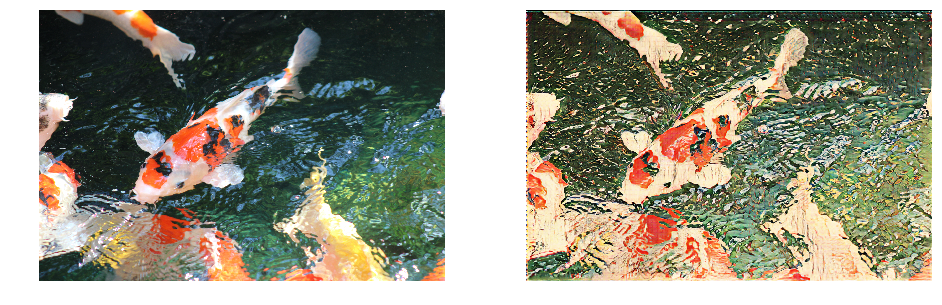

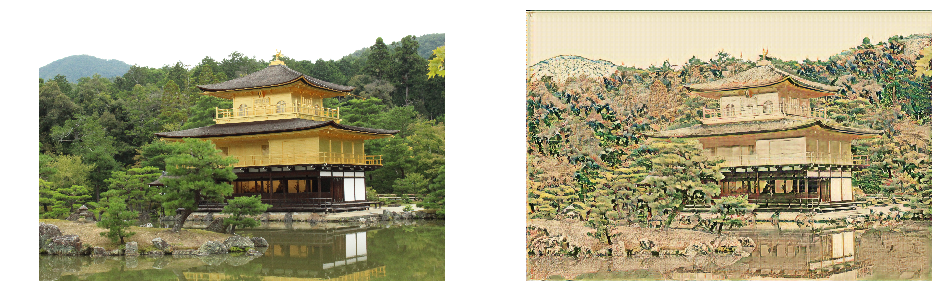

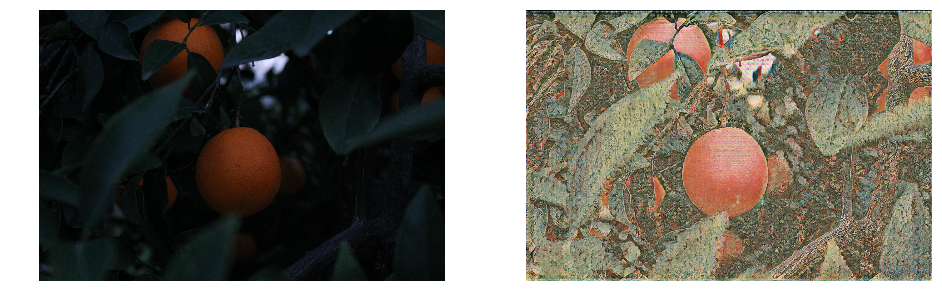

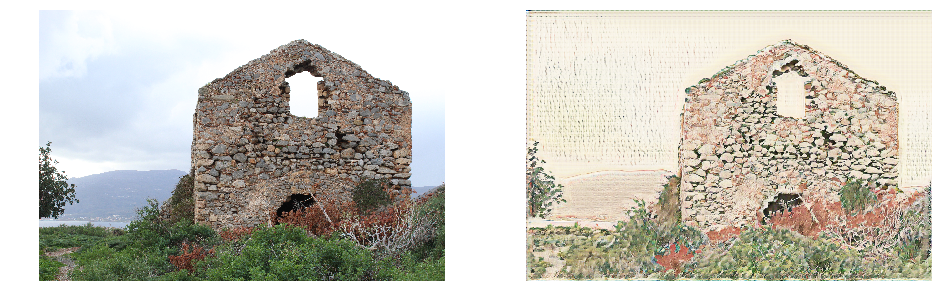

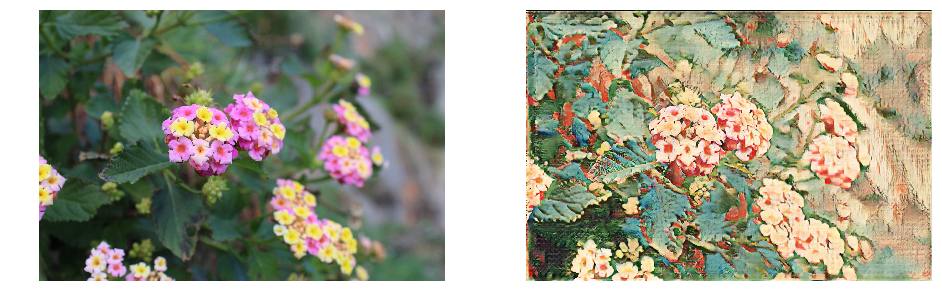

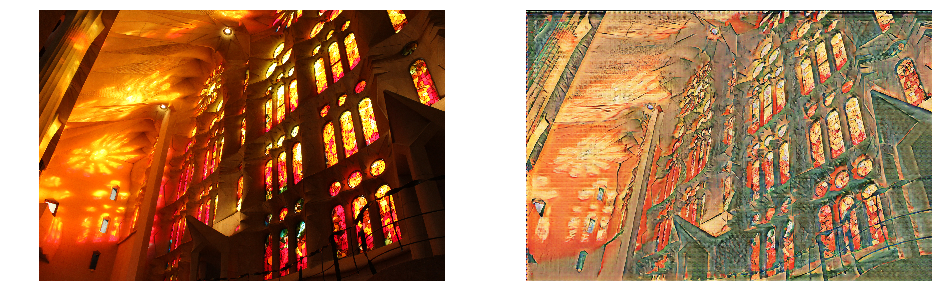

In [3]:
model = 'ukiyoe2photo';
modelfile = torch.load("./model/"+model+"/F.data");
F = MTF.prepModel(modelfile);

for i, img in enumerate(imgLoader):
    imgsize = img['img'].size();
    img_gpu = torch.cuda.FloatTensor(1,3,imgsize[2],imgsize[3]);
    img_var = Variable(img_gpu.copy_(img['img']));
    result = 0.5*(F(img_var).data+1.0);
    result = result.cpu().numpy().squeeze().transpose(1,2,0);
    plt.figure(figsize = (16,12))
    plt.subplot(1,2,1);
    plt.imshow(imgs[i])
    plt.axis('off');
    plt.subplot(1,2,2);
    plt.imshow(result)
    plt.axis('off');
plt.show();

del img_gpu
del F

<a id='bagpack'></a>
<h2>handbag_backpack</h2>
<a href='#contents'><p>Back to contents</p></a>

Finished loading images


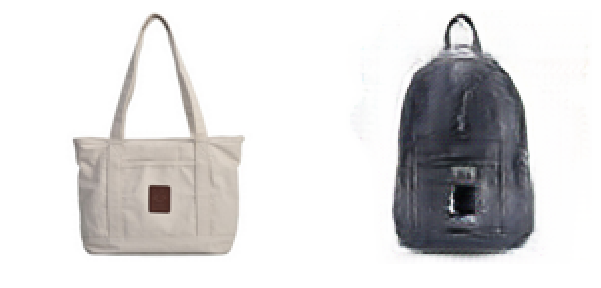

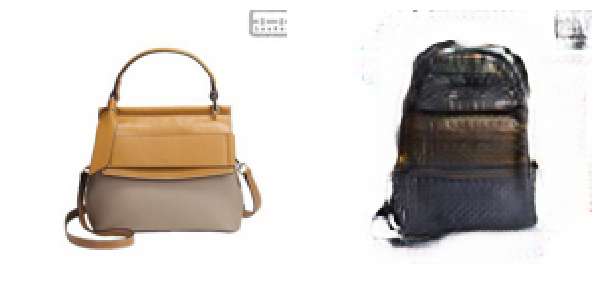

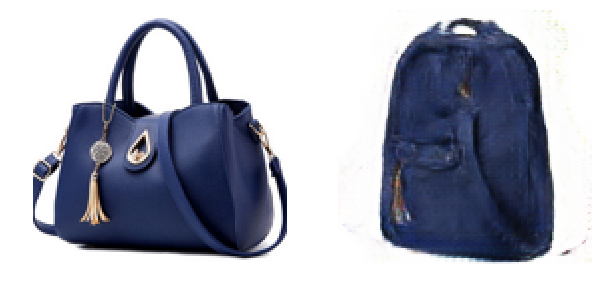

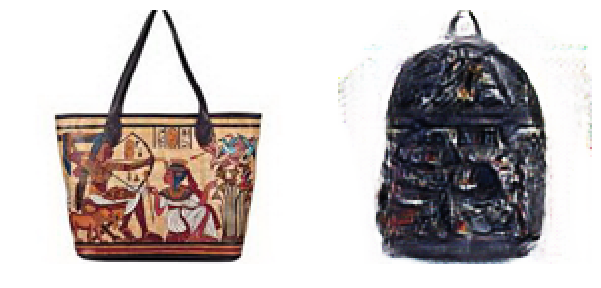

Finished loading images


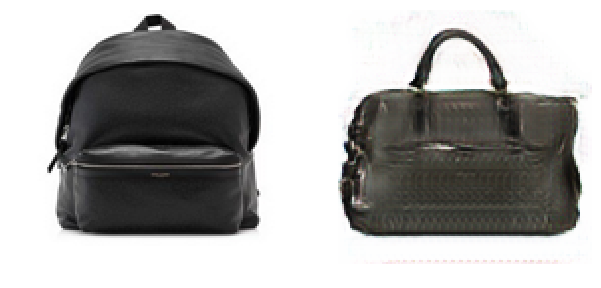

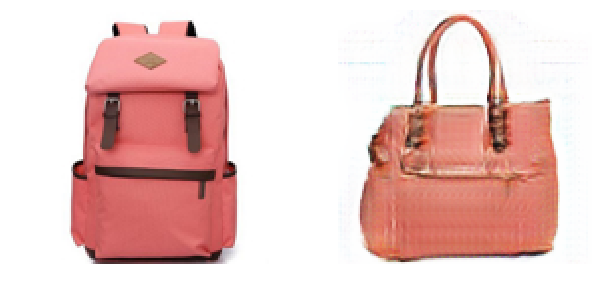

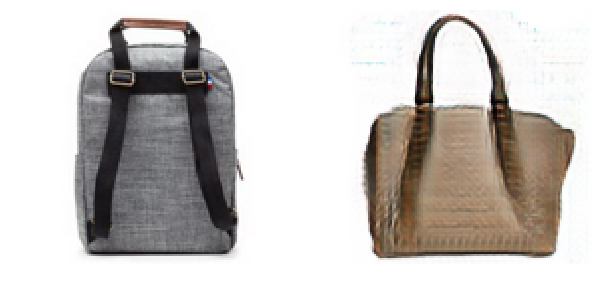

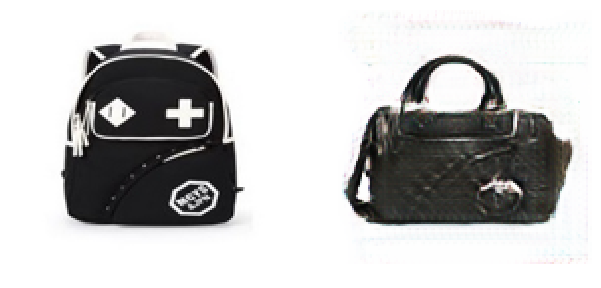

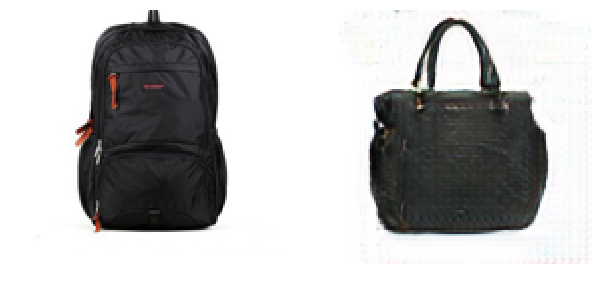

In [15]:
from PIL import Image
imageScale = 1;
im_size = 128
images = ImageSet();
path = './img/test_images_bag/handbag/'
test_transforms = [transforms.Resize(int(im_size*1.12), Image.BICUBIC),
                  transforms.CenterCrop(im_size),
                  transforms.ToTensor(),
                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))];
images.loadImageSet(path, test_transforms, "test", imageScale);
imgLoader = DataLoader(images, 1, shuffle=False);
   
model = 'handB_backP';
modelfile = torch.load("./model/"+model+"/G.data");
F = MTF.prepModel(modelfile);

for i, img in enumerate(imgLoader):
    imgsize = img['img'].size();
    img_gpu = torch.cuda.FloatTensor(1,3,imgsize[2],imgsize[3]);
    img_var = Variable(img_gpu.copy_(img['img']));
    result = 0.5*(F(img_var).data+1.0);
    result = result.cpu().numpy().squeeze().transpose(1,2,0);
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1);
    plt.imshow((0.5*(img['img'].numpy()+1)).squeeze().transpose(1,2,0))
    plt.axis('off');
    plt.subplot(1,2,2);
    plt.imshow(result)
    plt.axis('off');
plt.show();

imageScale = 1;
images = ImageSet();
path = './img/test_images_bag/backpack/'
test_transforms = [transforms.Resize(int(im_size*1.12), Image.BICUBIC),
                  transforms.CenterCrop(im_size),
                  transforms.ToTensor(),
                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))];
images.loadImageSet(path, test_transforms, "test", imageScale);
imgLoader = DataLoader(images, 1, shuffle=False);


modelfile = torch.load("./model/"+model+"/F.data");
F = MTF.prepModel(modelfile);

for i, img in enumerate(imgLoader):
    imgsize = img['img'].size();
    img_gpu = torch.cuda.FloatTensor(1,3,imgsize[2],imgsize[3]);
    img_var = Variable(img_gpu.copy_(img['img']));
    result = 0.5*(F(img_var).data+1.0);
    result = result.cpu().numpy().squeeze().transpose(1,2,0);
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1);
    plt.imshow((0.5*(img['img'].numpy()+1)).squeeze().transpose(1,2,0))
    plt.axis('off');
    plt.subplot(1,2,2);
    plt.imshow(result)
    plt.axis('off');
plt.show();

del img_gpu
del F

In [18]:
imageScale = 0.25;
images = ImageSet();
path = './img/test_images/'
test_transforms = [transforms.ToTensor(),
                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))];
images.loadImageSet(path, test_transforms, "test", imageScale);
imgLoader = DataLoader(images, 1, shuffle=False);
imgs = [];
for i in range(1,7):
    imgs.append(imageio.imread("./img/test_images/IMG_"+str(i)+".JPG"));

Finished loading images


<a id='vangogh'></a>
<h2>vangogh2photo</h2>
<a href='#contents'><p>Back to contents</p></a>

In [ ]:
model = 'vangogh2photo'
if (DOWNLOAD_MODELS):
    direct = "F";
    MTF.downloadModel(model, direct);
    modelfile = torch.load("./modelDL/"+model+"/" + direct + ".data");
    F = MTF.prepModel(modelfile);
    for i, img in enumerate(imgLoader):
        imgsize = img['img'].size();
        img_gpu = torch.cuda.FloatTensor(1,3,imgsize[2],imgsize[3]);
        img_var = Variable(img_gpu.copy_(img['img']));
        result = 0.5*(F(img_var).data+1.0);
        result = result.cpu().numpy().squeeze().transpose(1,2,0);
        plt.figure(figsize = (16,12))
        plt.subplot(1,2,1);
        plt.imshow(imgs[i])
        plt.axis('off');
        plt.subplot(1,2,2);
        plt.imshow(result)
        plt.axis('off');
    plt.show();

    del img_gpu
    del F
    os.remove("./modelDL/"+model+"/" + direct + ".data");
else:
    for i in range(1,7):
        plt.figure(figsize = (16,12))
        plt.subplot(1,2,1);
        plt.imshow(imgs[i-1])
        plt.axis('off');
        plt.subplot(1,2,2);
        imgo = imageio.imread("./outputs/"+model+"/test_images/out_IMG_"+str(i)+".JPG");
        plt.imshow(imgo)
        plt.axis('off');
    plt.show();